# TensofFlow

## The basics

### Preparing the data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv('data/fake_reg.csv')
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


We can see an historical price and two features. This must be an indication that it is a supervised learning problem. Since we have no categorization, we can even define it as a linear regression problem.

In [4]:
sns.set_style('darkgrid')

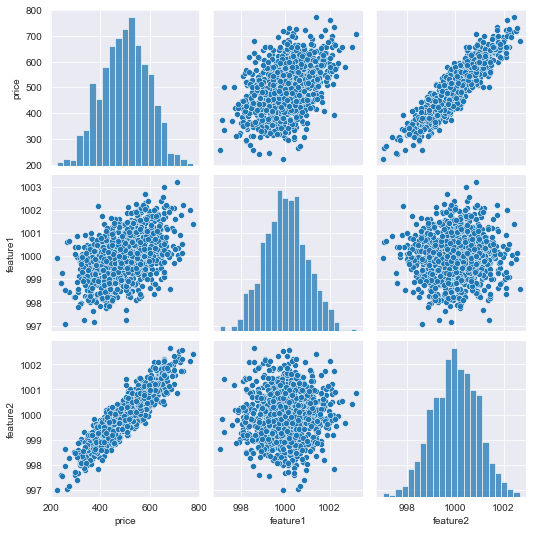

In [5]:
sns.pairplot(df)

#### Step 1: Split the data between training and testing

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X = df[['feature1', 'feature2']].values

In [8]:
y = df['price'].values

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Step 2: Normalize the data

Since we have **weights** and **biases** in our neurons. We need to make sure that they have the same 'impact' on all the possible values of our dataset. That is why it is preferable to normalize the data so that all the data is on the same scale. Otherwise datapoints with larger values might be over or under impacted by the weights and biases. This is called *vanishing* or *exploding* gradients.

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
# Create instance of the scaler
mm_scaler = MinMaxScaler()

In [12]:
# Calculate parameters required for scaling later on
mm_scaler.fit(X_train)

MinMaxScaler()

In [13]:
# Scaling the data
X_train = mm_scaler.transform(X_train)

In [14]:
X_test = mm_scaler.transform(X_test)

### Creating and Training the Model

As a quick reminder, a Neural Network model is composed of multiple layers: An input layer, and output layer and one or multiple hidden layers. This is why we know that we will have one entity (model) composed of multiple smaller entities (layers).

There are 2 ways of creating a Keras-based model. The first is to create a `Sequential` object passing it a list of layers (for example a list of `Dense` layers). The second is to create an empty `Sequential` object and use its `add()` method to add layers line by line.

**Dense layer**: A simple densely-connected NN layer. In other words it is a regular *feed-forward* network where every neuron is connected to all the neurons in the next layer.

The `Dense` layer takes many parameters, but the two most import are `units` and `activation`. **Units** corresponds to the amount of layers that the layer should contain. **Activation** corresponds to the activation function that should be used by the neurons of the layer (stringbased).

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

2022-06-14 15:25:52.631881: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-14 15:25:52.631905: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [16]:
model = Sequential()
model.add(Dense(units=4, activation='relu'))  # Input layer
model.add(Dense(units=4, activation='relu'))
model.add(Dense(units=4, activation='relu'))
model.add(Dense(units=1))                     # Output layer

2022-06-14 15:25:54.092808: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-06-14 15:25:54.092865: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-14 15:25:54.092910: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (nootaku-tuxedo): /proc/driver/nvidia/version does not exist
2022-06-14 15:25:54.093368: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Ok, we now have a model. As a reminder, we want our model to predict a specific **price**. In other words, the output of our output layer should be equal to the price column of our dataframe. This is why we chose a single unit in the output layer.

We do this by **compiling** our model.

Again, the mode `compile` has a lot of parameters. The two main ones we want to look at right now are the `optimizer` and the `loss`.

**Optimizer** corresponds to the way of performing the gradient descent (rmsprop, adam, ...).

**Loss** corresponds to a stringcode of a loss function.

---

***Choosing an optimizer and loss***

Keep in mind what kind of problem you are trying to solve:

For a multi-class classification problem
> ```python
    model.compile(
        optimizer='rmsprop',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
> ```
     
For a binary classification problem
> ```python
    model.compile(
        optimizer='rmsprop',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
> ```

For a mean squared error regression problem
> ```python
    model.compile(
        optimizer='rmsprop',
        loss='mse'
    )
> ```

In [17]:
model.compile(optimizer='rmsprop', loss='mse')

#### Training the model

An `epoch` is one iteration through our training data set.

In [18]:
model.fit(
    x=X_train,
    y=y_train,
    epochs=250
)

Epoch 1/250
22/22 [==============================] - 1s 1ms/step - loss: 256690.6250
Epoch 2/250
22/22 [==============================] - 0s 2ms/step - loss: 256604.8281
Epoch 3/250
22/22 [==============================] - 0s 2ms/step - loss: 256509.8906
Epoch 4/250
22/22 [==============================] - 0s 2ms/step - loss: 256397.6719
Epoch 5/250
22/22 [==============================] - 0s 2ms/step - loss: 256267.2500
Epoch 6/250
22/22 [==============================] - 0s 2ms/step - loss: 256117.6250
Epoch 7/250
22/22 [==============================] - 0s 3ms/step - loss: 255948.7344
Epoch 8/250
22/22 [==============================] - 0s 3ms/step - loss: 255759.3125
Epoch 9/250
22/22 [==============================] - 0s 3ms/step - loss: 255550.5625
Epoch 10/250
22/22 [==============================] - 0s 2ms/step - loss: 255320.5469
Epoch 11/250
22/22 [==============================] - 0s 2ms/step - loss: 255070.1250
Epoch 12/250
22/22 [==============================] - 0s 2ms/st

<AxesSubplot:>

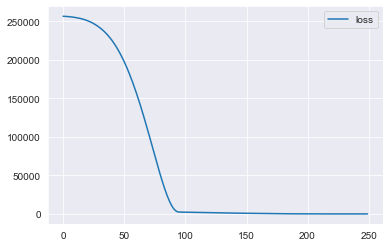

In [19]:
# Let's have a look at our loss over time
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

### Model Evaluation

By calling the model's `evaluate` method we can get a single float as return. This corresponds to the loss of the model for the given `x` and `y` (usually `X_test` and `y_test`). The returned loss is of course in the metric chosen during the fitting of the model (in our case `mse` or mean squared error).

In [20]:
model.evaluate(X_test, y_test, verbose=0)

25.86409568786621

In [27]:
test_predictions = model.predict(X_test)

10/10 [==============================] - 0s 2ms/step


In [28]:
predictions = pd.Series(test_predictions.reshape(300,))
predictions_df = pd.DataFrame(y_test, columns=['True Y'])
predictions_df = pd.concat([predictions_df, predictions], axis=1)
predictions_df.columns = ['True Y', 'Prediction']
predictions_df.head()

,True Y,Prediction
0,402.296319,405.994354
1,624.156198,624.517944
2,582.455066,593.050720
3,578.588606,573.185669
4,371.224104,367.359894


<AxesSubplot:xlabel='True Y', ylabel='Prediction'>

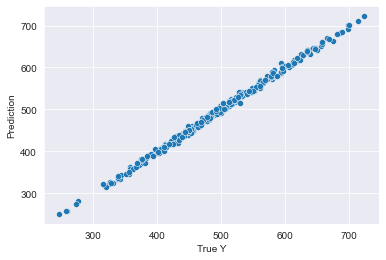

In [29]:
sns.scatterplot(x='True Y', y='Prediction', data=predictions_df)

In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [32]:
# How far off are we on average ?
mean_absolute_error(predictions_df['True Y'], predictions_df['Prediction'])

4.11122426419027

In [34]:
# If we look at the average price, this means an error of less than then 1% off.
df.describe()

,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,1000.014171,999.979847
std,93.785431,0.974018,0.948330
min,223.346793,997.058347,996.995651
25%,433.025732,999.332068,999.316106
50%,502.382117,1000.009915,1000.002243
75%,564.921588,1000.637580,1000.645380
max,774.407854,1003.207934,1002.666308


In [35]:
mean_squared_error(predictions_df['True Y'], predictions_df['Prediction'])

25.864101878196944

In [36]:
mean_squared_error(predictions_df['True Y'], predictions_df['Prediction'])**0.5

5.085676147593055

#### New item

What if I have a new item I don't know the price of, but I know it's features: `feature1 = 998` and `feature2 = 1000`. How do I predict its value?

First thing to remember, the training data has been normalized, so we need to scale those values as well !

In [37]:
new_item = [[998, 1000]]

In [38]:
# Scale values
new_item = mm_scaler.transform(new_item)

# Predict
model.predict(new_item)

1/1 [==============================] - 0s 17ms/step


array([[420.49036]], dtype=float32)

### Saving and Loading models

#### Saving

In [39]:
from tensorflow.keras.models import load_model

In [40]:
model.save('my_new_model.h5')

#### Loading

In [42]:
loaded_model = load_model('my_new_model.h5')
loaded_model.predict(new_item)

1/1 [==============================] - 0s 61ms/step


array([[420.49036]], dtype=float32)